In [1]:
from aimon.helpers.demo_functions import load_and_prepare_data_for_training, train_random_forest, evaluate_model, apply_trained_model_to_unlabelled_data, save_model, load_model
from aimon import ProjectChange
from sklearn.model_selection import train_test_split
import os 

# Set current directory to the location of the notebook (works even if __file__ is not defined)
try:
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_dir = os.getcwd()

os.chdir(current_dir)


In [2]:
# Path to the unlabelled change events test file
labelled_file = "../test_data/change_events_labelled.json"
unlabelled_file = "../test_data/change_events_unlabelled.json"
outfolder = "../test_data/out"

random_state = 3
# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True]
}

# Predefined paths for output
predicted_file = os.path.join(outfolder, "change_events_labelled_using_random_forest.json")
model_file = os.path.join(outfolder, "best_model.joblib")
os.makedirs(outfolder, exist_ok=True)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Classification Report:
                           precision    recall  f1-score   support

gravitationalMassMovement       0.85      0.83      0.84       363
               vegetation       0.78      0.80      0.79       263

                 accuracy                           0.82       626
                macro avg       0.81      0.82      0.82       626
             weighted avg       0.82      0.82      0.82       626



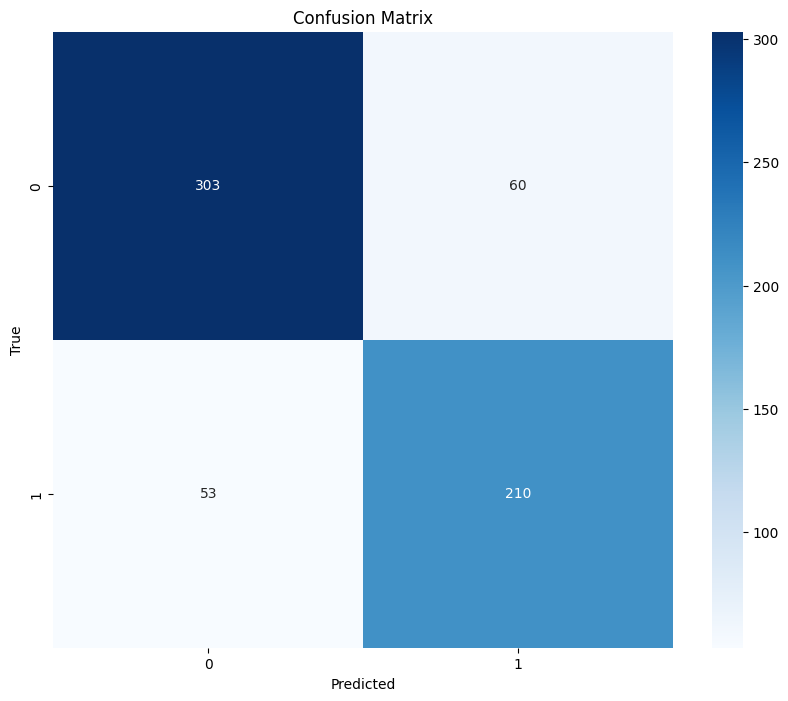

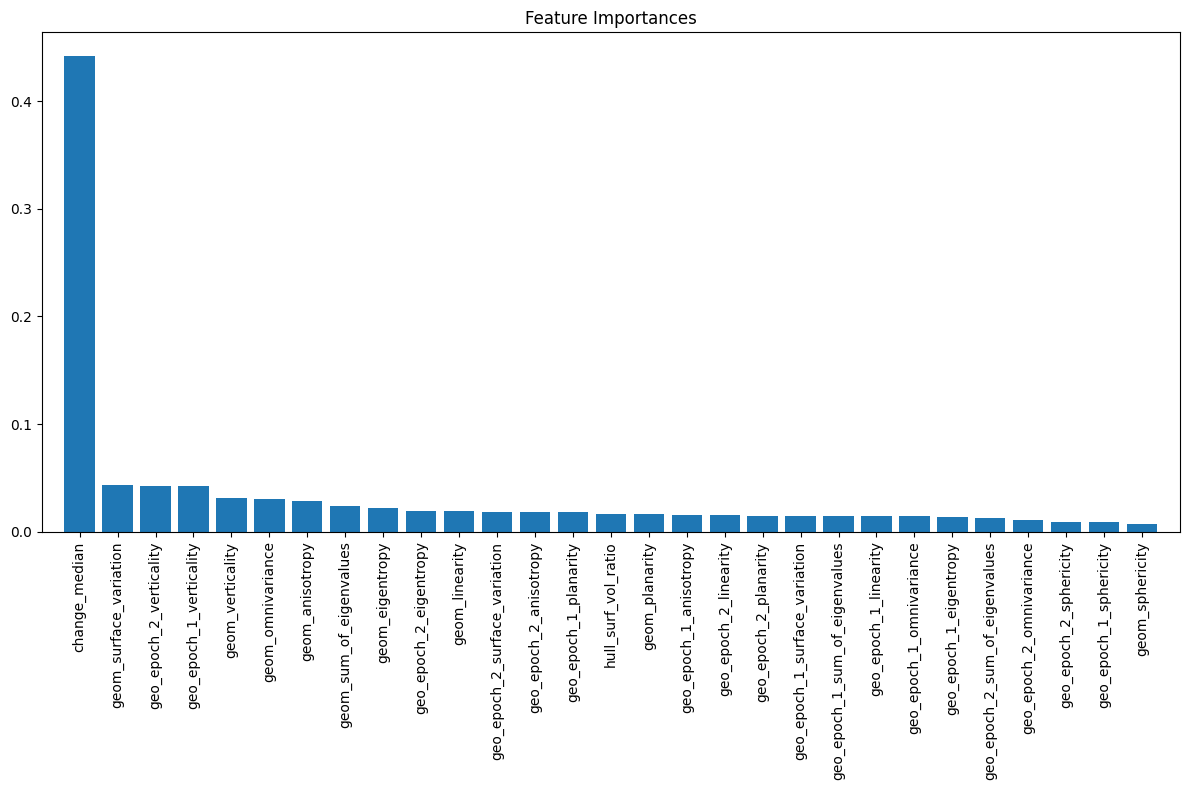

Jaccard Score: 0.6892600916884972
Accuracy Score: 0.8194888178913738
F1 Score: 0.8154148846506117
Matthews Correlation Coefficient: 0.6310419593218826
Cohen's Kappa: 0.6308769659462111


In [3]:
# Load and prepare the data for training
X, y, labels = load_and_prepare_data_for_training(labelled_file)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=random_state)

# Train model with grid search
best_rf, _ = train_random_forest(X_train, y_train, param_grid, random_state)

# Evaluate the trained model
evaluate_model(best_rf, X_test, y_test, labels)

# Apply the trained model to unlabelled data
apply_trained_model_to_unlabelled_data(best_rf, unlabelled_file, predicted_file)

# Save to .geojson for visual inspection

In [3]:
change_prj = ProjectChange(change_event_file = predicted_file,
                           project_name = os.path.basename(predicted_file)[:-4],
                           projected_image_folder = "",
                           projected_events_folder = outfolder)
change_prj.project_change()

Missing some information, cannot find 
Missing some information, cannot project change into image


### Optional: Save and load the model

In [4]:
save_model(best_rf, model_file)
load_model(model_file)

Model saved to ../test_data/out\best_model.joblib
Model loaded from ../test_data/out\best_model.joblib


RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=None,
                       min_samples_leaf=4, n_estimators=50, random_state=3)